In [44]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string

In [26]:
df = pd.read_csv('mohler_joined.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,id,question,refanswer,answer,score_me,score_other,score_avg
0,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,High risk problems are address in the prototyp...,4.0,3.0,3.5
1,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,To simulate portions of the desired final prod...,5.0,5.0,5.0
2,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,A prototype program simulates the behaviors of...,5.0,3.0,4.0
3,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,Defined in the Specification phase a prototype...,5.0,5.0,5.0
4,1.1,What is the role of a prototype program in pro...,To simulate the behaviour of portions of the d...,It is used to let the users have a first idea ...,3.0,3.0,3.0


In [27]:
df.mean()

/var/folders/jq/kz7wkyw119l0hh2x8vfr60gh0000gn/T/ipykernel_20379/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


id             7.134659
score_me       3.923449
score_other    4.406731
score_avg      4.165090
dtype: float64

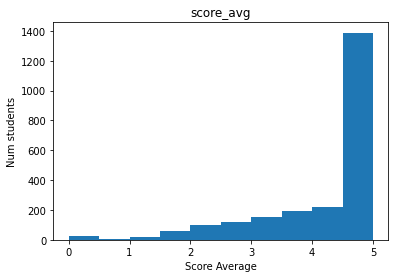

In [30]:
df.hist(column = 'score_avg', grid=False)
plt.xlabel('Score Average')
plt.ylabel('Num students')

plt.show()

In [41]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prabhleenbindra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prabhleenbindra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Token Counts: 23232
Unique Tokens: 2799
Token Frequency Distribution:
[('function', 549), ('array', 488), ('list', 405), ('data', 337), ('node', 292), ('element', 285), ('pointer', 240), ('first', 214), ('one', 185), ('tree', 180)]


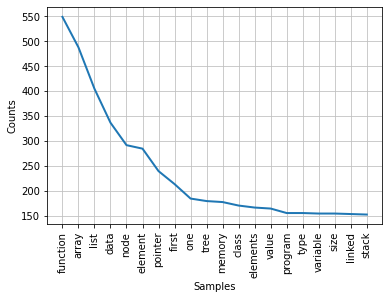

In [48]:

stopwords = set(nltk.corpus.stopwords.words('english'))
punctuation = set(string.punctuation)

tokens = df['answer'].apply(nltk.tokenize.word_tokenize)
filtered_tokens = tokens.apply(lambda x: [word for word in x if word.lower() not in stopwords and word.lower() not in punctuation])
all_filtered_tokens = [token for sublist in filtered_tokens for token in sublist]
token_counts = len(all_filtered_tokens)
answers_vocab = (set(all_filtered_tokens))
answers_vocab_len = len(answers_vocab)


freq_dist = nltk.probability.FreqDist(all_filtered_tokens)

print("Token Counts:", token_counts)
print("Unique Tokens:", answers_vocab_len)
print("Token Frequency Distribution:")


freq_dist.plot(20, cumulative=False)
plt.xlabel('')
plt.ylabel('Num students')
plt.show()